In [1]:
import eDiskplot as eplot
import matplotlib.pyplot as plt
from astropy.visualization import AsinhStretch, ImageNormalize
from eDisk_source_dict import source_dict
import numpy as np
import analysis_utils as au
from qdisk.product import calculate_averaged_spectra, calculate_pvdiagram, calculate_moment, calculate_radial_profile
from qdisk.model import Keplerian_velocity
import qdisk.utils as utils
from qdisk.classes import FitsImage
from matplotlib import ticker
%matplotlib widget
%load_ext autoreload
%autoreload 2

source = "L1489IRS"
baseline = "SBLB"
line = "SO"
robust = 1.0
vsys = source_dict[source]["v_sys"]
center_coord = source_dict[source]["radec"]
vrange =7
rmax = 8
moment_chunks = 4
imagename = au.customimagepath + au.get_image_basename(source, baseline, line, robust=robust)

In [ ]:
# moment 0
moment = "q"
mapname = au.VADPpath + au.get_image_basename(source, baseline, line, robust=robust)
calculate_moment(
    imagename,
    moments=[moment],
    save=True,
    savefilename=mapname,
    # nchunks=moment_chunks,
)

In [3]:
image = FitsImage(imagename)

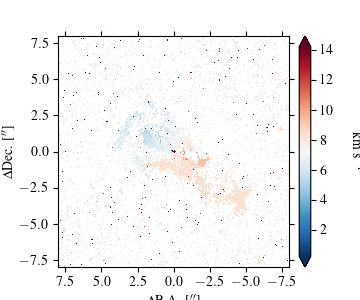

In [12]:
from eDiskplot import plot_rotation_map

rotmapname = au.VADPpath + au.get_image_basename(
    source, baseline, line, robust=robust
).replace(".fits", "_v0.fits")

fig, ax = plot_rotation_map(
    rotmapname,
    imagename,
    center_coord=center_coord,
    xlim=(-rmax, rmax),
    ylim=(-rmax, rmax),
    vrange=vrange,
    vsys=vsys,
    figsize=(3.6,3)
)

ax.xaxis.set_major_locator(ticker.MaxNLocator(7))
ax.yaxis.set_major_locator(ticker.MaxNLocator(7))


[None, (0.5, -0.5), (-0.5, 0.5)]

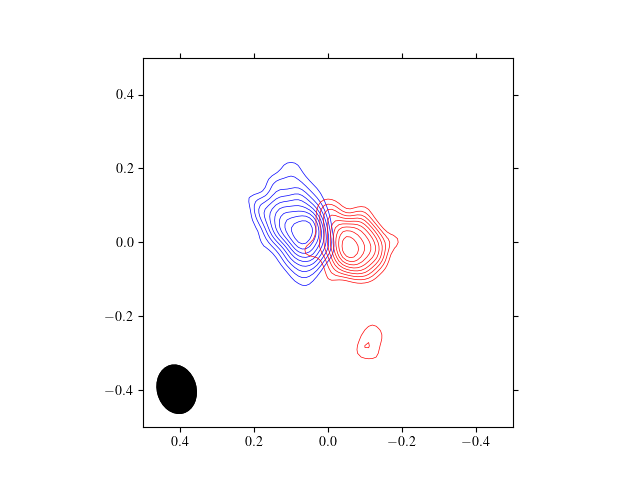

In [7]:
fig, ax = plt.subplots()

# blue
image.spectrally_collapse(vrange=(vsys-7, vsys-5), sigma_clip=None, mode="integ")

# # measure the noise levels of collapsed
# image.get_mask(rmin=12, rmax=14)

noise = np.nanstd(image.collapsed)

utils.plot_2D_map(
    image.collapsed,
    X=image.x,
    Y=image.y,
    ax=ax,
    # cmap=True, 
    # cmap_method="pcolorfast",
    # contour=False,
    cmap=False,
    contour=True,
    colorbar=False,
    beam=image.beam,
    beam_kw=dict(color="black"),
    contour_kw=dict(levels=np.linspace(4*noise, image.collapsed.max(), 10), colors="blue", linewidths=0.5)
)

# red
image.spectrally_collapse(vrange=(vsys+5, vsys+7), sigma_clip=None, mode="integ")

# # measure the noise levels of collapsed
# image.get_mask(rmin=12, rmax=14)

noise = np.nanstd(image.collapsed)

utils.plot_2D_map(
    image.collapsed,
    X=image.x,
    Y=image.y,
    ax=ax,
    # cmap=True, 
    # cmap_method="pcolorfast",
    # contour=False,
    cmap=False,
    contour=True,
    colorbar=False,
    beam=image.beam,
    beam_kw=dict(color="black", fill=True, linewidths=0.5),
    contour_kw=dict(levels=np.linspace(4*noise, image.collapsed.max(), 10), colors="red", linewidths=0.5)
)

ax.set(aspect=1./ax.get_data_ratio(), xlim=(rmax, -rmax), ylim=(-rmax, rmax))


[Text(0.5, 0, '$\\Delta$R.A. [$^{\\prime\\prime}$]'),
 Text(0, 0.5, '$\\Delta$Dec. [$^{\\prime\\prime}$]')]

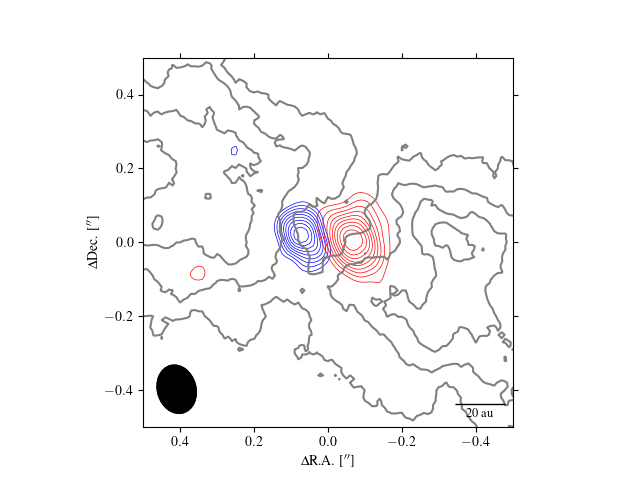

In [18]:
fig, ax = plt.subplots()

rmax = 0.5

# blue
image.spectrally_collapse(vrange=(vsys-10, vsys-8), sigma_clip=None, mode="integ")

# # measure the noise levels of collapsed
# image.get_mask(rmin=12, rmax=14)

noise = np.nanstd(image.collapsed)

utils.plot_2D_map(
    image.collapsed,
    X=image.x,
    Y=image.y,
    ax=ax,
    # cmap=True, 
    # cmap_method="pcolorfast",
    # contour=False,
    cmap=False,
    contour=True,
    colorbar=False,
    beam=image.beam,
    beam_kw=dict(color="black"),
    contour_kw=dict(levels=np.linspace(4*noise, image.collapsed.max(), 10), colors="blue", linewidths=0.5)
)

# red
image.spectrally_collapse(vrange=(vsys+8, vsys+10), sigma_clip=None, mode="integ")

# # measure the noise levels of collapsed
# image.get_mask(rmin=12, rmax=14)

noise = np.nanstd(image.collapsed)

utils.plot_2D_map(
    image.collapsed,
    X=image.x,
    Y=image.y,
    ax=ax,
    # cmap=True, 
    # cmap_method="pcolorfast",
    # contour=False,
    cmap=False,
    contour=True,
    colorbar=False,
    beam=image.beam,
    scale=(20/146, "20 au"),
    beam_kw=dict(color="black", fill=True, linewidths=0.5),
    sbar_kw=dict(color="black"),
    contour_kw=dict(levels=np.linspace(4*noise, image.collapsed.max(), 10), colors="red", linewidths=0.5)
)

ax.set(aspect=1./ax.get_data_ratio(), xlim=(rmax, -rmax), ylim=(-rmax, rmax))


fitsname = au.VADPpath + au.get_image_basename(source, baseline, "C18O", robust=robust).replace(".fits", "_2sigma_M0.fits")
C18O = FitsImage(fitsname)
ax.contour(image.x, image.y, C18O.data, levels=np.array([10, 15, 20, 25])*2.11, colors="grey")

ax.set(xlabel=eplot.RAlabel, ylabel=eplot.Declabel)

In [ ]:
fig.savefig(au.VADPpath + "SO_C18O_comparison_zoom.pdf", bbox_inches="tight", pad_inches=0.01)

Loading data...
Plotting v = -10.00 km/s...
Plotting v = -8.50 km/s...
Plotting v = -7.00 km/s...
Plotting v = -5.50 km/s...
Plotting v = -4.00 km/s...
Plotting v = -2.50 km/s...
Plotting v = -1.00 km/s...
Plotting v = 0.50 km/s...
Plotting v = 2.00 km/s...
Plotting v = 3.50 km/s...
Plotting v = 5.00 km/s...
Plotting v = 6.50 km/s...
Plotting v = 8.00 km/s...
Plotting v = 9.50 km/s...
Plotting v = 11.00 km/s...
Plotting v = 12.50 km/s...
Plotting v = 14.00 km/s...
Plotting v = 15.50 km/s...
Plotting v = 17.00 km/s...
Plotting v = 18.50 km/s...
Plotting v = 20.00 km/s...
Plotting v = 21.50 km/s...
Plotting v = 23.00 km/s...
Plotting v = 24.50 km/s...


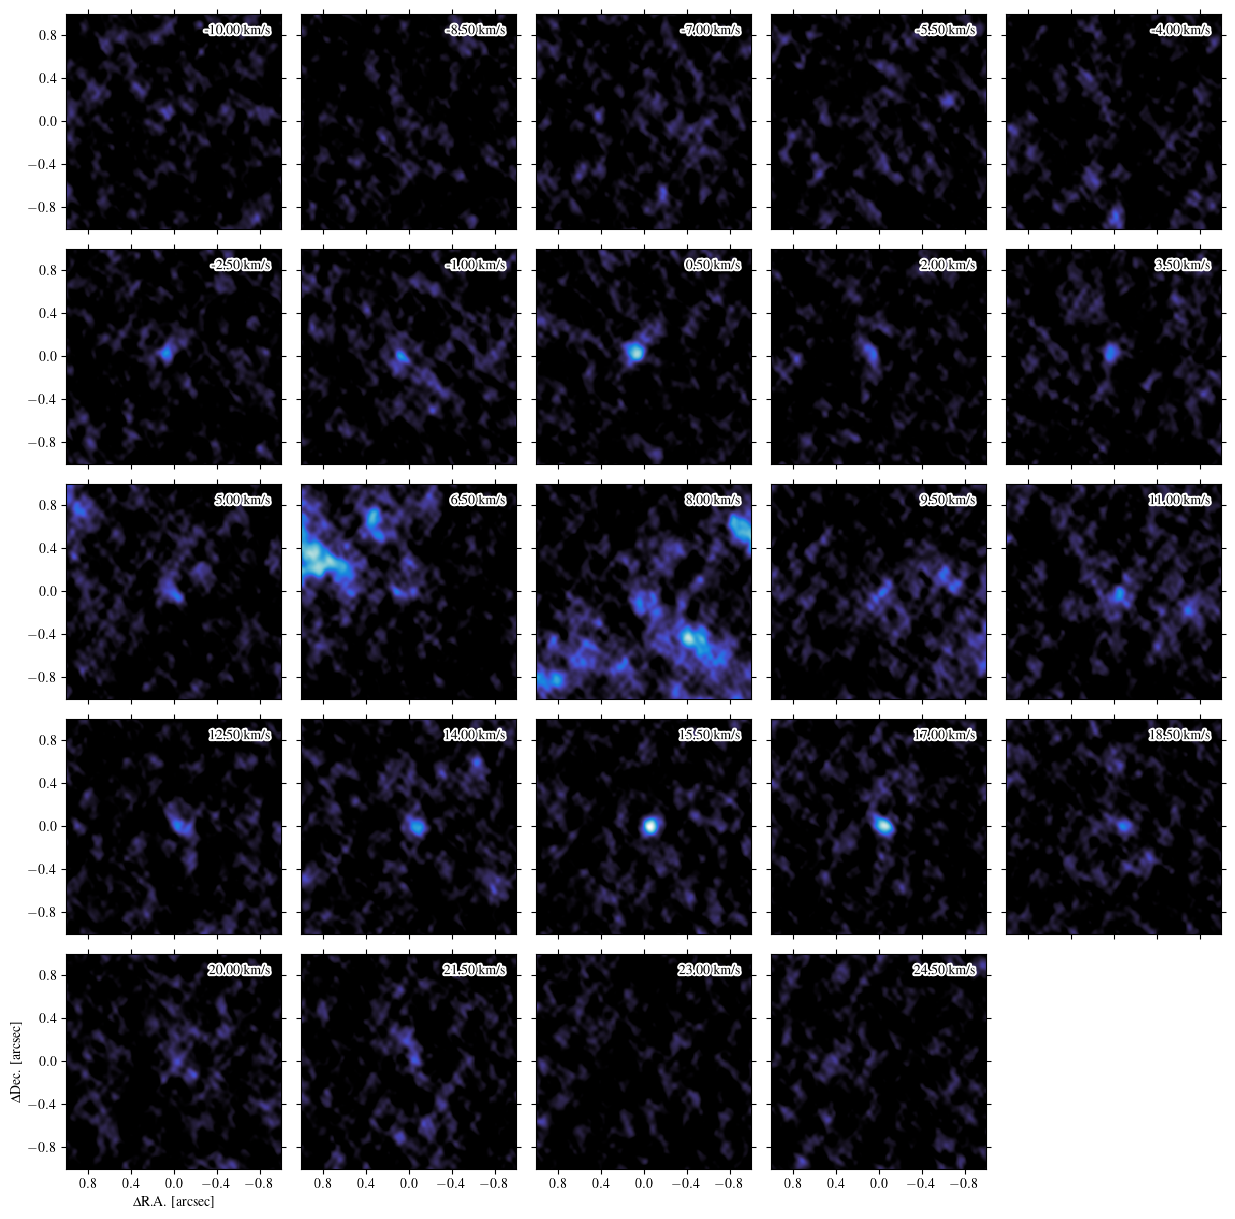

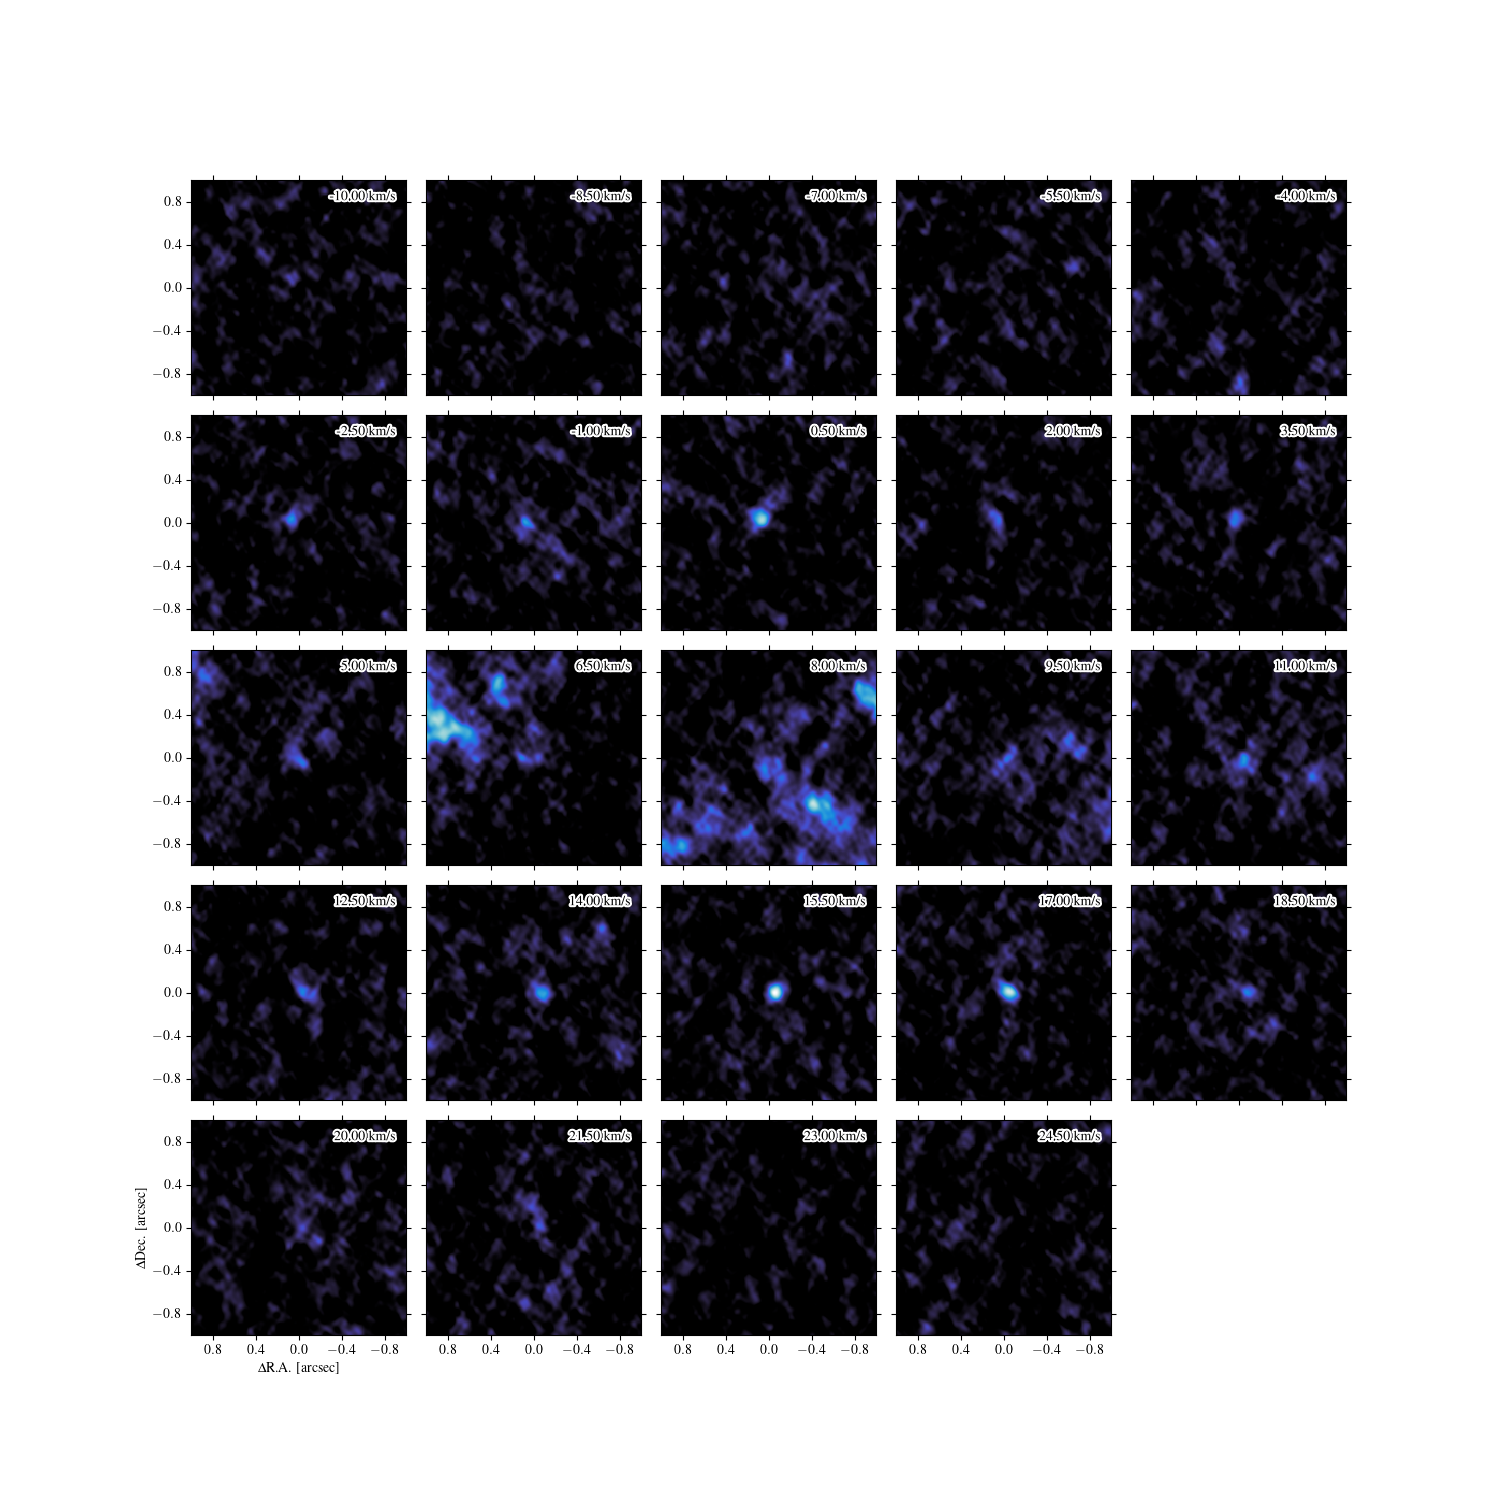

In [16]:
# check channel maps to determine the emission extent
eplot.plot_channel_map(imagename, center_coord=center_coord, rmax=1, vrange=None, thin=5, sigma_clip=None, pad=0.2)

In [5]:
# moment 0
moment = 0
mom0name = au.VADPpath + au.get_image_basename(source, baseline, line)
calculate_moment(
    imagename,
    moments=[moment],
    vel_extent=source_dict[source]["emission_extent"][line],
    save=True,
    savefilename=mom0name,
    nchunks=moment_chunks,
)


Loading data...
Estimating rms...
Generating threshold mask...
Generating channel mask based on specified velocity range...
Combining the masks...
Calculating moment 0...
Going to compute with 4 chunks...
Computing chunk 0...
Computing chunk 1...
Computing chunk 2...
Computing chunk 3...
Restoring the original array...


{0: (array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]))}

[(5.0, -5.0), (-5.0, 5.0), None]

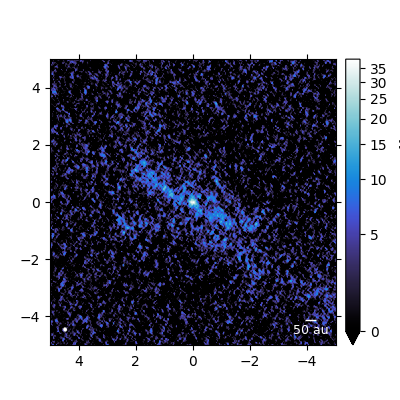

In [6]:
# plot mooment 0
fig, ax = plt.subplots(figsize=(4, 4))

eplot.plot_map(
    mom0name.replace(".fits", "_M0.fits"),
    ax=ax,
    center_coord=center_coord,
    data_scaling_factor=au.data_scaling_factor["M0"],
    cmap=eplot.cmap["M0"],
    norm_kwargs=norm_kwargs["M0"],
    cbar_kw=au.cbar_kw["M0"],
    beam_kw=au.beam_kw["M0"],
    sbar_kw=au.sbar_kw["M0"]
)
ax.set(xlim=(5, -5), ylim=(-5, 5), aspect=1./ax.get_data_ratio())

In [7]:
# radial profile
rmax = 2
wedge_angle = 90
calculate_radial_profile(
    imagename=mom0name.replace(".fits", "_M0.fits"),
    PA=source_dict[source]["PA"],
    incl=source_dict[source]["incl"],
    center_coord=center_coord,
    rmax=rmax,
    wedge_angle=wedge_angle,
    save=True,
    savefileheader="r [arcsec] \t I [mJy/beam km/s] \t dI [mJy/beam km/s]"
)

Loading data...
Calculating radial profile...


(array([0.01303298, 0.03909895, 0.06516491, 0.09123088, 0.11729685,
        0.14336281, 0.16942878, 0.19549474, 0.22156071, 0.24762668,
        0.27369264, 0.29975861, 0.32582457, 0.35189054, 0.37795651,
        0.40402247, 0.43008844, 0.4561544 , 0.48222037, 0.50828634,
        0.5343523 , 0.56041827, 0.58648423, 0.6125502 , 0.63861617,
        0.66468213, 0.6907481 , 0.71681406, 0.74288003, 0.76894599,
        0.79501196, 0.82107793, 0.84714389, 0.87320986, 0.89927582,
        0.92534179, 0.95140776, 0.97747372, 1.00353969, 1.02960565,
        1.05567162, 1.08173759, 1.10780355, 1.13386952, 1.15993548,
        1.18600145, 1.21206742, 1.23813338, 1.26419935, 1.29026531,
        1.31633128, 1.34239724, 1.36846321, 1.39452918, 1.42059514,
        1.44666111, 1.47272707, 1.49879304, 1.52485901, 1.55092497,
        1.57699094, 1.6030569 , 1.62912287, 1.65518884, 1.6812548 ,
        1.70732077, 1.73338673, 1.7594527 , 1.78551867, 1.81158463,
        1.8376506 , 1.86371656, 1.88978253, 1.91

[(0.0, 1.9),
 (0.0, 39.491338155),
 Text(0.5, 0, 'Radius [arcsec]'),
 Text(0, 0.5, 'I [mJy beam$^{-1}$ km s$^{-1}$]')]

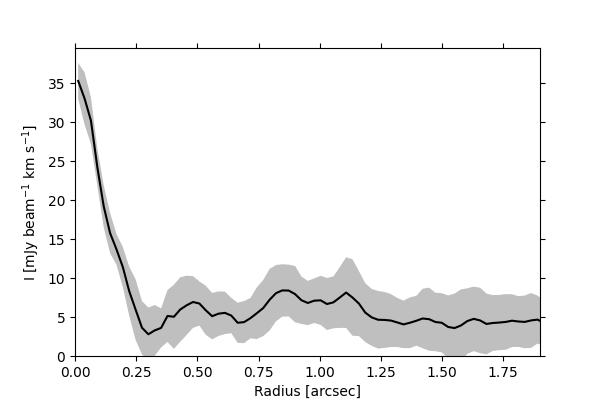

In [10]:
# plot radial profile
fig, ax = plt.subplots(figsize=(6, 4))

eplot.plot_radial_profile(mom0name.replace(".fits", "_M0_radialProfileWedge90deg.txt"), ax=ax, color="black")
ax.set(xlim=(0, 1.9), ylim=(0, None), xlabel="Radius [arcsec]", ylabel="I [mJy beam$^{-1}$ km s$^{-1}$]")

[(0.0, 1.9),
 (0.0, 1.3),
 Text(0.5, 0, 'Radius [arcsec]'),
 Text(0, 0.5, 'I [mJy beam$^{-1}$ km s$^{-1}$]')]

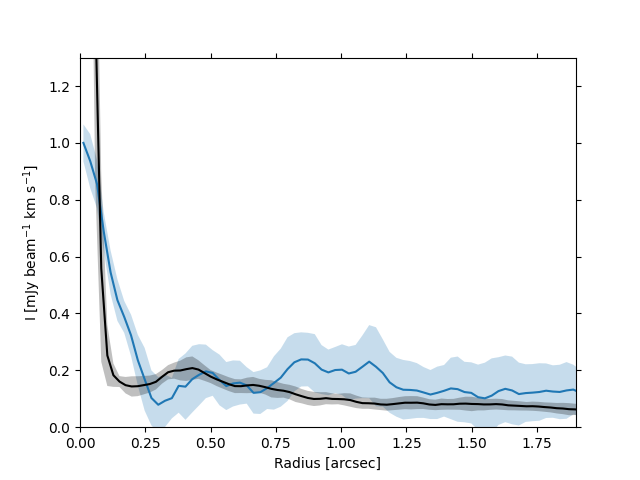

In [12]:
# comparison with continuum
contprofile = "./VADP/L1489IRS_SBLB_continuum_robust_1.0.image.tt0_radialProfileWedge90deg.txt"
fig, ax = plt.subplots()

eplot.plot_radial_profile(mom0name.replace(".fits", "_M0_radialProfileWedge90deg.txt"), ax=ax, color="tab:blue", normalize=True)
eplot.plot_radial_profile(contprofile, ax=ax, color="black", normalize=True, scale=5)
ax.set(xlim=(0, 1.9), ylim=(0, 1.3), xlabel="Radius [arcsec]", ylabel="I [mJy beam$^{-1}$ km s$^{-1}$]")

In [3]:
# mom1
moment = 1
mom1name = au.VADPpath + au.get_image_basename(source, baseline, line)
# calculate_moment(
#     imagename,
#     moments=[moment],
#     vel_extent=source_dict[source]["emission_extent"][line],
#     save=True,
#     threshold=(-np.inf, 4),
#     savefilename=mom1name,
#     nchunks=moment_chunks,
# )


[(5.0, -5.0), (-5.0, 5.0), None]

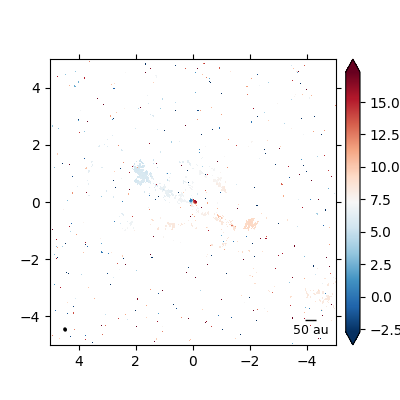

In [4]:
# plot moment 1
fig, ax = plt.subplots(figsize=(4, 4))

eplot.plot_map(
    mom1name.replace(".fits", "_M1.fits"),
    ax=ax,
    center_coord=center_coord,
    data_scaling_factor=au.data_scaling_factor["M1"],
    cmap=eplot.cmap["M1"],
    norm_kwargs=norm_kwargs["M1"],
    cbar_kw=au.cbar_kw["M1"],
    beam_kw=au.beam_kw["M1"],
    sbar_kw=au.sbar_kw["M1"]
)
ax.set(xlim=(5, -5), ylim=(-5, 5), aspect=1./ax.get_data_ratio())

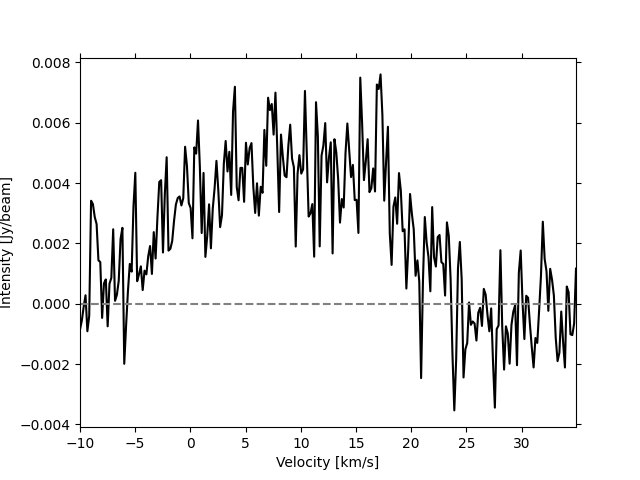

In [6]:
# check spectrum
v, spec, specerr = calculate_averaged_spectra(imagename, rmin=0.0, rmax=0.1, PA=80, incl=73)

fig, ax = utils.plot_1D_profile(x=v, y=spec)
ax.set(xlabel="Velocity [km/s]", ylabel="Intensity [Jy/beam]")
ax.axhline(y=0.0, color="grey", ls="dashed")

In [3]:
# PV diagram
posax, velax, diagram = calculate_pvdiagram(imagename, center_coord=center_coord, PA=69, rrange=(-2,2))

Loading data ...
Calculating PV diagram...
Done.


(-5.500000003919377, 14.37299999235486)

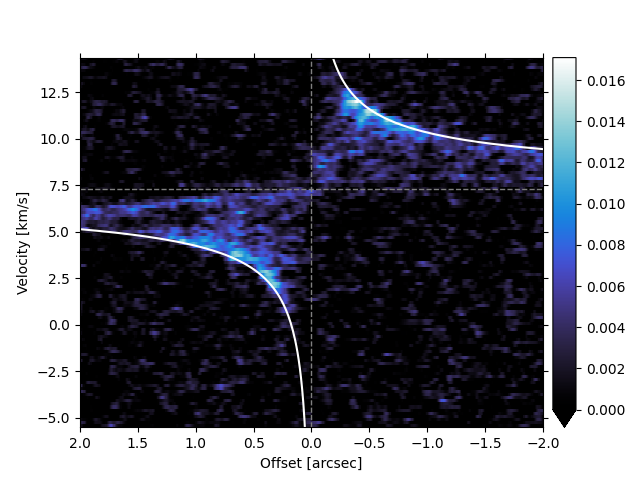

In [4]:
fig, ax = plt.subplots()
utils.plot_2D_map(
    data=diagram,
    X=posax,
    Y=velax,
    ax=ax,
    cmap_method="pcolorfast",
    contour=False,
    cmap_kw=dict(cmap=eplot.cmap["M0"], norm=ImageNormalize(diagram, vmin=0.0)),
)
ax.axhline(y=source_dict[source]["v_sys"], color="grey", ls="dashed", lw=1.0)
ax.axvline(x=0.0, color="grey", ls="dashed", lw=1.0)
ax.set(xlabel="Offset [arcsec]", ylabel="Velocity [km/s]")

r = posax.copy()
vkep_r = (
    Keplerian_velocity(
        r=r[r < 0.0],
        Mstar=1.6,
        distance=source_dict[source]["distance"],
        incl=source_dict[source]["incl"],
    )
    + source_dict[source]["v_sys"]
)
vkep_b = (
    -Keplerian_velocity(
        r=r[r > 0.0],
        Mstar=1.6,
        distance=source_dict[source]["distance"],
        incl=source_dict[source]["incl"],
    )
    + source_dict[source]["v_sys"]
)
ax.plot(posax[posax < 0.0], vkep_r, color="white")
ax.plot(posax[posax > 0.0], vkep_b, color="white")
ax.set_ylim(velax.min(), velax.max())
